In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# zscore
from scipy.stats import zscore
# scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import *
# partitioning
from sklearn.model_selection import train_test_split
# naive bayes
from sklearn.naive_bayes import GaussianNB, CategoricalNB
# plot things
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve
# pattern mining
from fim import apriori

In [2]:
df = pd.read_csv("ravdess_features.csv")
df_orig = df.copy()

# Classification

### Choice of attributes

Each of us select a classification method and then select two variables, one to be classified by ourselves and one to be compared with the other methods, as clustering.
Classification methods:

* Naive Bayes - Claudio
* kNN - Andrea
* Decision trees - Steffania

Possible variables:

* emotion, emotion_positivity, emotional_intensity, sex

We select these variables because they seems to us the most interesting variables to predict.

## Partitioning and Naive Bayes

In [3]:
def get_emotion_positivity(x):
    if(x == 'fearful' or x == 'angry' or x =='sad' or x == 'disgust'):
        return -1;
    if(x == 'happy' or x == 'surprised'): # is calm positive?
        return 1;
    return 0;

df["emotion_positivity"] = df["emotion"].map(get_emotion_positivity)

In [4]:
#def doublepartition_df(df, value1, value2, attribute1, attribute2):
#    tmp = df.copy()
#    ret = {}
#    partitions = tmp[attribute1].unique()
#    for p in partitions:
#        ret[p] = df[(tmp[attribute1] == p)]
#    tmp = ret[value1].copy()
#    ret2 = {}
#    partitions = tmp[attribute2].unique()
#    for p in partitions:
#        ret2[p] = ret[value1][(tmp[attribute2] == p)]
#    return ret2[value2]

#### Gaussian

In [5]:
def naive_bayes(df, pred):
    y = np.array(df[pred])
    categorical_cols = ["emotion", "sex", "emotion_positivity", "emotional_intensity"]
    df = pd.get_dummies(df, columns=categorical_cols)
    X = df.values
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=0
    )
    print("Stratify:\n")
    print(np.unique(y, return_counts=True)[1] / len(y))
    print(np.unique(y_train, return_counts=True)[1] / len(y_train))
    print(np.unique(y_test, return_counts=True)[1] / len(y_test))
    print("\nShapes:\n")
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, "\n")
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Classification report:\n")
    print(classification_report(y_test, y_pred))
    print("ROC curve:\n")
    # https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
    plt.rcParams["figure.figsize"] = [12, 8]
    plot_roc(y_test, clf.predict_proba(X_test))
    plt.show()
    try:
        print("ROC AUC score: ", roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", average="macro"))
    except ValueError:
        pass
    print("\nConfusion matrix:\n")
    cf = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf, annot=True, cmap="Greens")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [6]:
#attr_part1 = "statement"
#val1 = "Kids are talking by the door"
#
#attr_part2 = "emotional_intensity"
#val2 = "strong"
#
#kids_strong = doublepartition_df(df, val1, val2, attr_part1, attr_part2)
#kids_strong.T

In [7]:
df = df.drop(columns = ["modality", "vocal_channel", "statement", "repetition", "actor", "channels", "frame_width"]).dropna()

##### "Emotion"

Stratify:

[0.15158924 0.15403423 0.08312958 0.15403423 0.150978   0.07823961
 0.14914425 0.07885086]
[0.15196507 0.15371179 0.08296943 0.15371179 0.1510917  0.07860262
 0.14934498 0.07860262]
[0.15071283 0.15478615 0.08350305 0.15478615 0.15071283 0.07739308
 0.14867617 0.07942974]

Shapes:

(1145, 43) (491, 43) (1145,) (491,) 

Classification report:

              precision    recall  f1-score   support

       angry       0.49      0.65      0.56        74
        calm       0.69      0.74      0.71        76
     disgust       0.56      0.59      0.57        41
     fearful       0.65      0.39      0.49        76
       happy       0.76      0.55      0.64        74
     neutral       0.50      0.50      0.50        38
         sad       0.79      0.47      0.59        73
   surprised       0.40      0.90      0.55        39

    accuracy                           0.58       491
   macro avg       0.60      0.60      0.58       491
weighted avg       0.63      0.58      0.58     

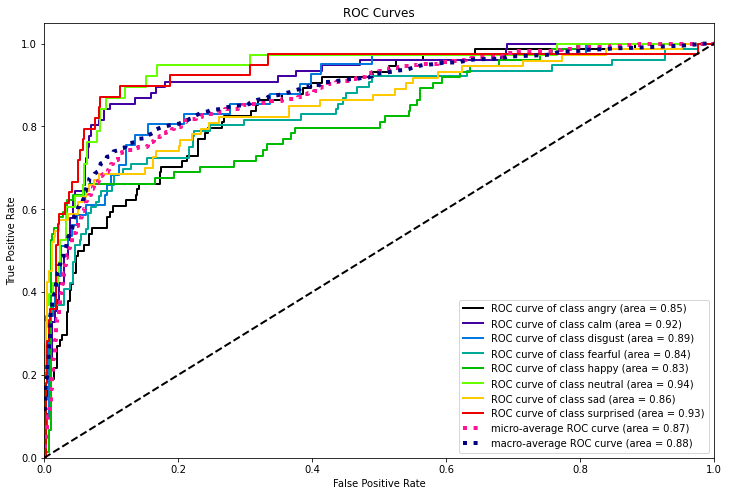

ROC AUC score:  0.880734436962547

Confusion matrix:



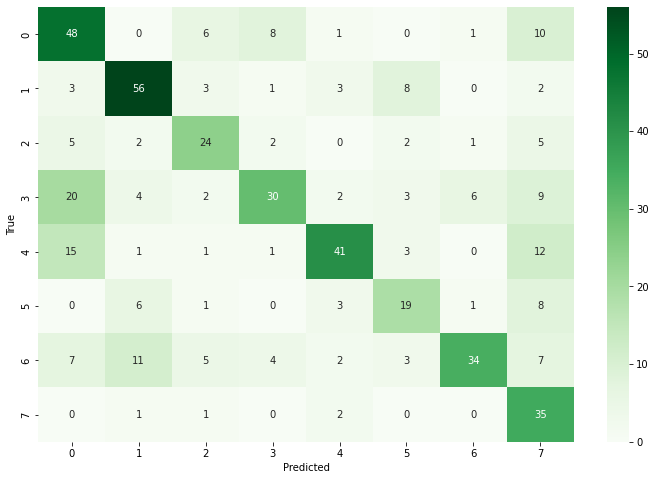

In [8]:
var_pred = "emotion" # <--- this is the variable prediction parameter
naive_bayes(df, var_pred)

Low reliability of the model for the _emotion_ prediction.

##### "Sex"

Stratify:

[0.48288509 0.51711491]
[0.48296943 0.51703057]
[0.48268839 0.51731161]

Shapes:

(1145, 43) (491, 43) (1145,) (491,) 

Classification report:

              precision    recall  f1-score   support

           F       0.95      0.89      0.92       237
           M       0.91      0.96      0.93       254

    accuracy                           0.93       491
   macro avg       0.93      0.93      0.93       491
weighted avg       0.93      0.93      0.93       491

ROC curve:



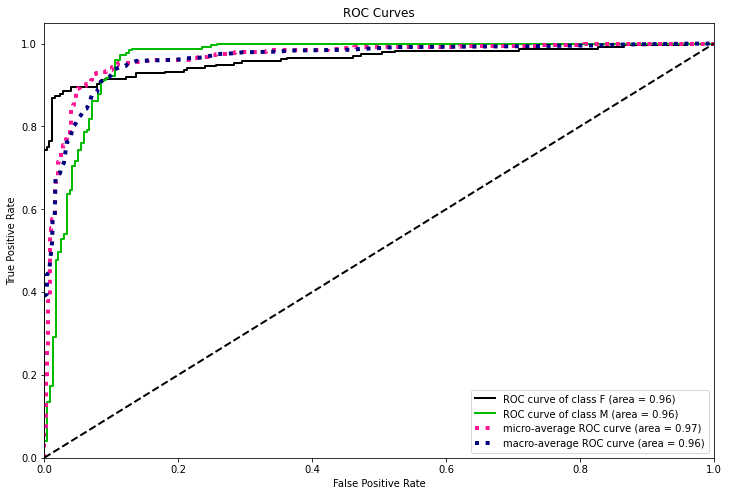


Confusion matrix:



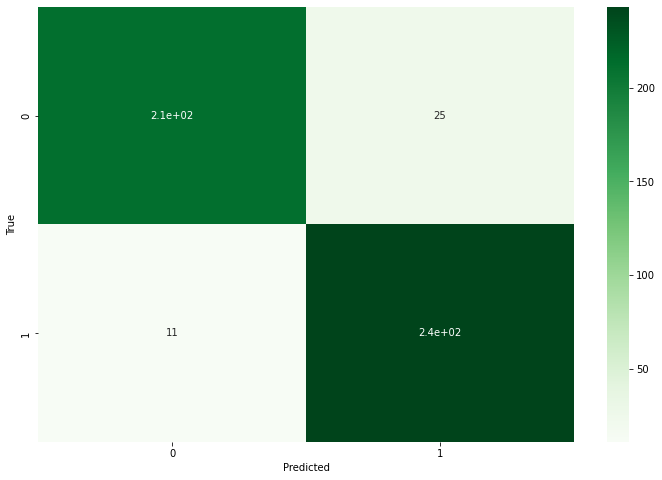

In [9]:
var_pred = "sex" # <--- this is the variable prediction parameter
naive_bayes(df, var_pred)

##### "emotional_intensity"

Stratify:

[0.53178484 0.46821516]
[0.53187773 0.46812227]
[0.53156823 0.46843177]

Shapes:

(1145, 43) (491, 43) (1145,) (491,) 

Classification report:

              precision    recall  f1-score   support

      normal       0.71      0.82      0.76       261
      strong       0.75      0.62      0.68       230

    accuracy                           0.72       491
   macro avg       0.73      0.72      0.72       491
weighted avg       0.73      0.72      0.72       491

ROC curve:



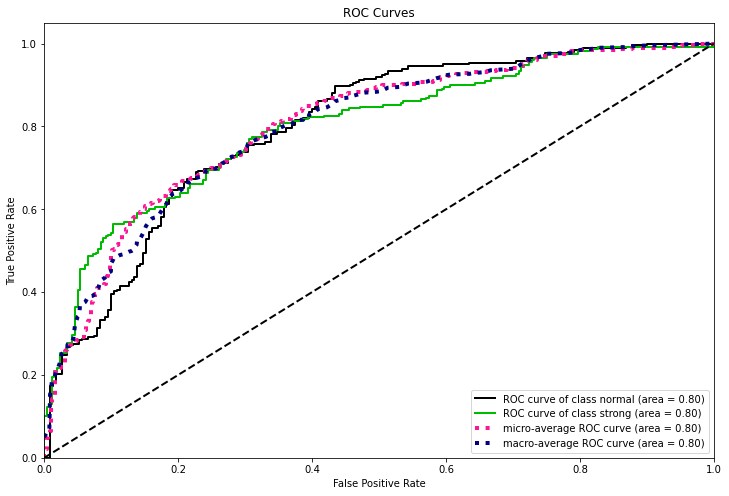


Confusion matrix:



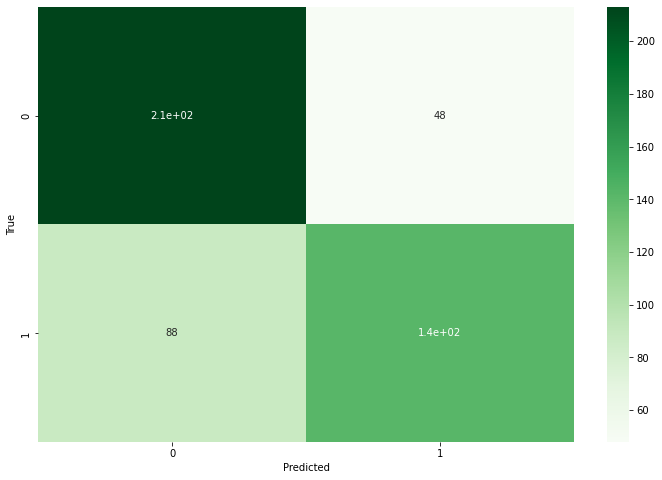

In [10]:
var_pred = "emotional_intensity" # <--- this is the variable prediction parameter
naive_bayes(df, var_pred)

##### "emotion_positivity"

Stratify:

[0.53789731 0.23227384 0.22982885]
[0.53799127 0.23231441 0.22969432]
[0.53767821 0.23217923 0.23014257]

Shapes:

(1145, 43) (491, 43) (1145,) (491,) 

Classification report:

              precision    recall  f1-score   support

          -1       0.77      0.69      0.73       264
           0       0.56      0.84      0.67       114
           1       0.76      0.57      0.65       113

    accuracy                           0.70       491
   macro avg       0.70      0.70      0.68       491
weighted avg       0.72      0.70      0.70       491

ROC curve:



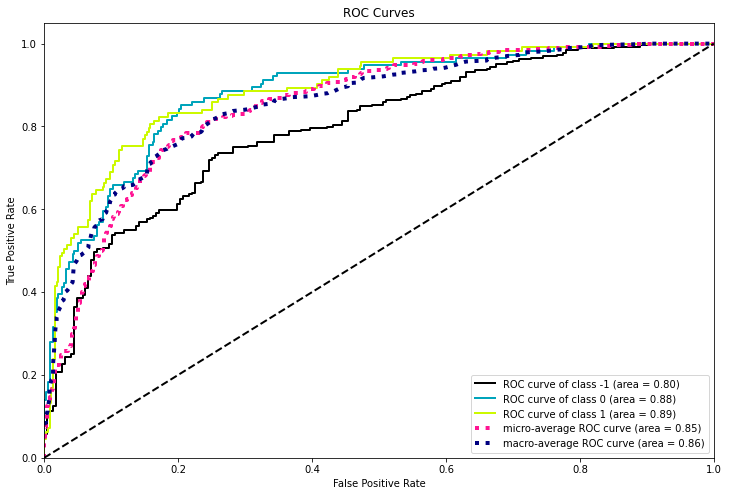

ROC AUC score:  0.8551194338376543

Confusion matrix:



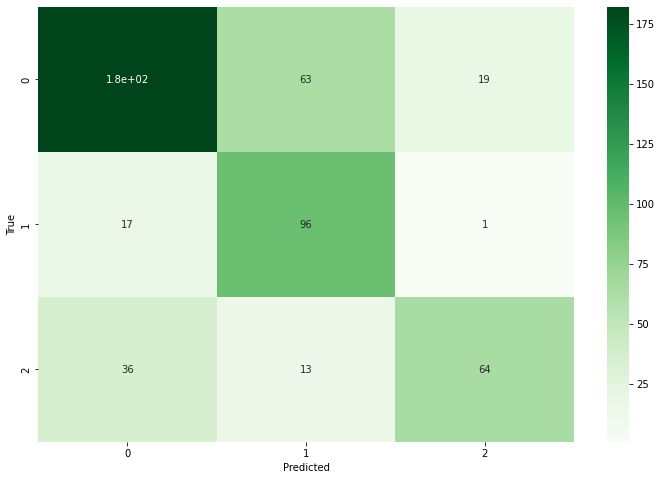

In [11]:
var_pred = "emotion_positivity" # <--- this is the variable prediction parameter
naive_bayes(df, var_pred)

#### Categorical

In [12]:
def naive_bayes_cat(df, pred):
    y = np.array(df[pred])
    categorical_cols = ["emotion", "sex"]
    df = pd.get_dummies(df, columns=categorical_cols)
    X = df.values
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=0
    )
    non_cat_columns = [ # commented variables contain redundant values that prevent NB from working properly
        "intensity",
        "zero_crossings_sum",
        "length_ms",
        "frame_count",
        #"sample_width",
        #"frame_rate",
        "mfcc_mean",
        "mfcc_min",
        "mfcc_max",
        "mfcc_std",
        "sc_mean",
        #"sc_min",
        "sc_max",
        "sc_std",
        "sc_kur",
        "sc_skew",
        "stft_mean",
        #"stft_min",
        #"stft_max",
        "stft_std",
        "stft_kur",
        "stft_skew",
        "mean",
        "std",
        "min",
        "max",
        "skew",
        "kur"
    ]

    X_noncat = df[non_cat_columns].values

    X_train_noncat, X_test_noncat, y_train_noncat, y_test_noncat = train_test_split(
        X_noncat, y, test_size=0.3, stratify=y, random_state=0
    )

    # train and test set should be binned separately
    X_train_cat = list()
    for column_idx in range(X_train_noncat.shape[1]):
        X_train_cat.append(pd.qcut(X_train_noncat[:, column_idx], q=4, labels=False))
    X_train_cat = np.array(X_train_cat).T

    X_test_cat = list()
    for column_idx in range(X_test_noncat.shape[1]):
        X_test_cat.append(pd.qcut(X_test_noncat[:, column_idx], q=4, labels=False))
    X_test_cat = np.array(X_test_cat).T

    print("Shapes:\n")
    print(X_train_cat.shape, X_test_cat.shape)
    clf = CategoricalNB()
    clf.fit(X_train_cat, y_train_noncat)
    y_pred = clf.predict(X_test_cat)
    print("\nClassification report:\n")
    print(classification_report(y_test, y_pred))
    print("ROC curve:\n")
    # https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
    plt.rcParams["figure.figsize"] = [12, 8]
    plot_roc(y_test_noncat, clf.predict_proba(X_test_cat))
    plt.show()
    try:
        print("ROC AUC score: ", roc_auc_score(y_test_noncat, clf.predict_proba(X_test_cat), multi_class="ovr", average="macro"))
    except ValueError:
        pass
    print("\nConfusion matrix:\n")
    cf = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf, annot=True, cmap="Greens")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

##### "Emotion"

Shapes:

(1145, 23) (491, 23)

Classification report:

              precision    recall  f1-score   support

       angry       0.38      0.61      0.47        74
        calm       0.40      0.47      0.44        76
     disgust       0.45      0.34      0.39        41
     fearful       0.31      0.05      0.09        76
       happy       0.23      0.26      0.24        74
     neutral       0.15      0.18      0.16        38
         sad       0.20      0.14      0.16        73
   surprised       0.31      0.46      0.37        39

    accuracy                           0.31       491
   macro avg       0.30      0.31      0.29       491
weighted avg       0.31      0.31      0.29       491

ROC curve:



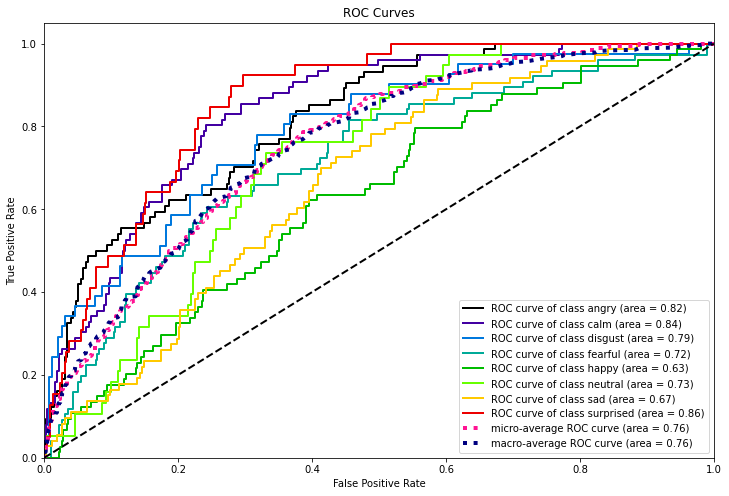

ROC AUC score:  0.7549089283570103

Confusion matrix:



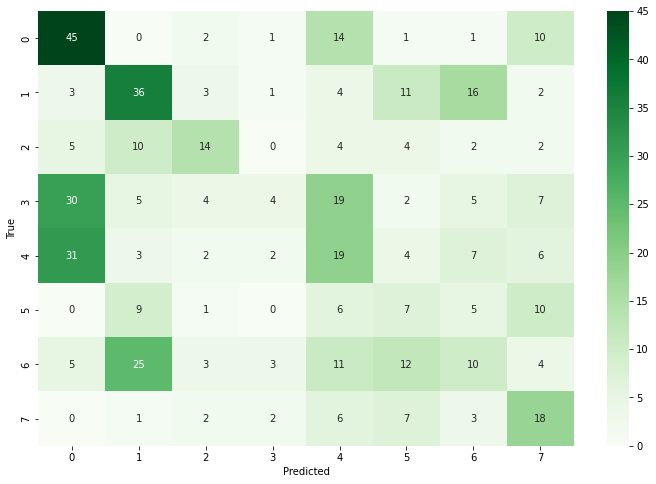

In [13]:
var_pred = "emotion" # <--- this is the variable prediction parameter
naive_bayes_cat(df, var_pred)

Very low reliability as regards the prediction of _emotion_ on the Categorical. The score of categorical test is lower than non categorical one.

##### "Sex"

Shapes:

(1145, 23) (491, 23)

Classification report:

              precision    recall  f1-score   support

           F       0.87      0.82      0.84       237
           M       0.84      0.88      0.86       254

    accuracy                           0.85       491
   macro avg       0.85      0.85      0.85       491
weighted avg       0.85      0.85      0.85       491

ROC curve:



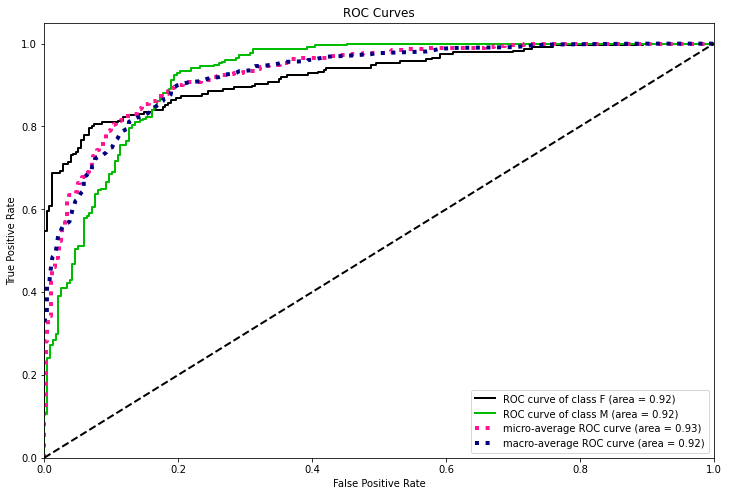


Confusion matrix:



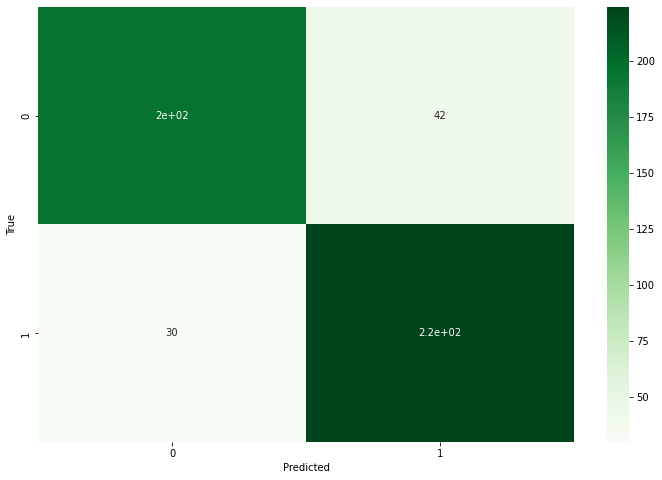

In [14]:
var_pred = "sex" # <--- this is the variable prediction parameter
naive_bayes_cat(df, var_pred)

##### "emotion_positivity"

Shapes:

(1145, 23) (491, 23)

Classification report:

              precision    recall  f1-score   support

          -1       0.63      0.50      0.56       264
           0       0.47      0.82      0.59       114
           1       0.31      0.22      0.26       113

    accuracy                           0.51       491
   macro avg       0.47      0.51      0.47       491
weighted avg       0.52      0.51      0.50       491

ROC curve:



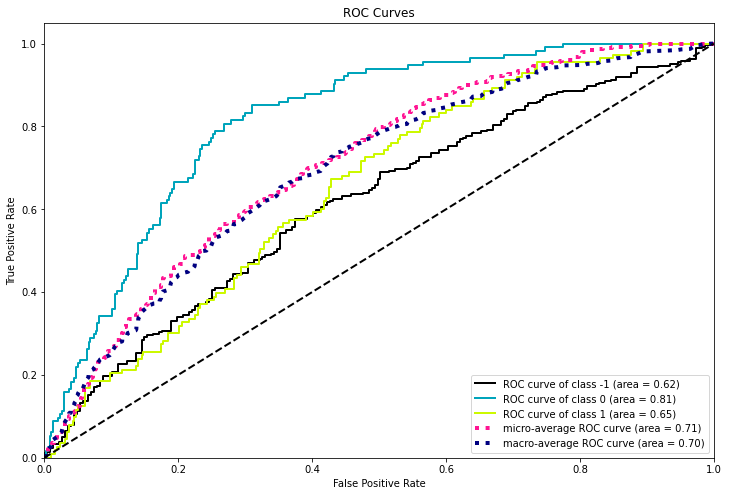

ROC AUC score:  0.6940185579333834

Confusion matrix:



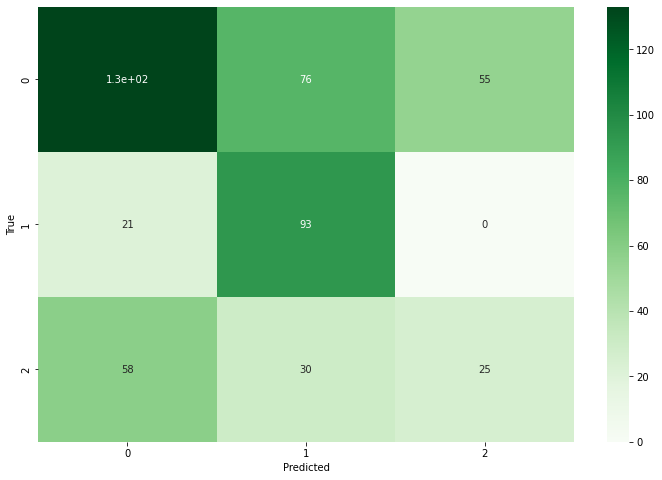

In [15]:
var_pred = "emotion_positivity" # <--- this is the variable prediction parameter
naive_bayes_cat(df, var_pred)

##### "emotional_intensity"

Shapes:

(1145, 23) (491, 23)

Classification report:

              precision    recall  f1-score   support

      normal       0.66      0.78      0.72       261
      strong       0.69      0.55      0.61       230

    accuracy                           0.67       491
   macro avg       0.67      0.66      0.66       491
weighted avg       0.67      0.67      0.67       491

ROC curve:



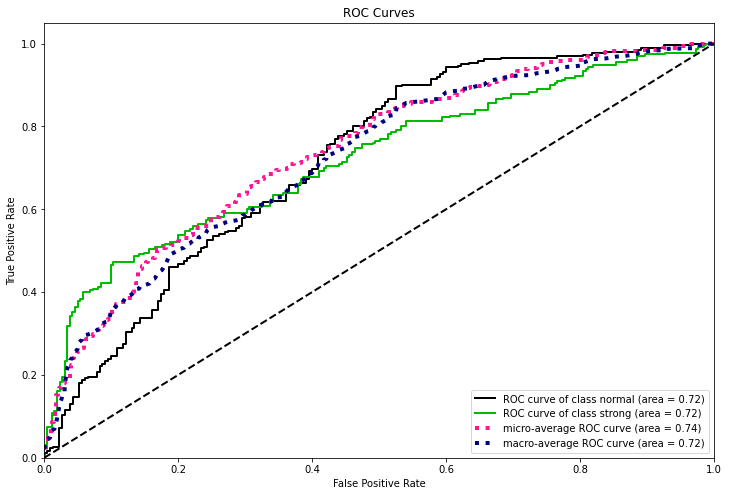


Confusion matrix:



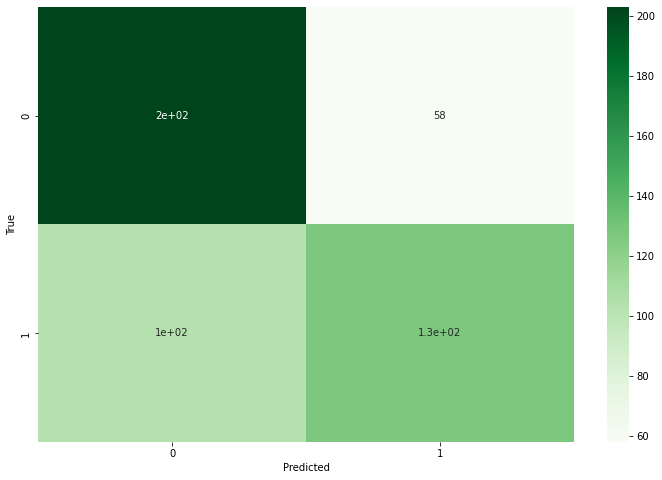

In [16]:
var_pred = "emotional_intensity" # <--- this is the variable prediction parameter
naive_bayes_cat(df, var_pred)

# Pattern mining

In [18]:
df_orig = df_orig.drop(columns = ["sample_width", "frame_width", "channels", "modality", "frame_rate", "sc_min", "stft_min", "stft_max"]).dropna()
X = df_orig.values.tolist()
df_orig.T

,0,4,8,15,16,18,19,21,24,26,...,2422,2424,2428,2431,2433,2435,2438,2439,2441,2448
vocal_channel,speech,song,speech,song,speech,speech,speech,song,speech,speech,...,speech,speech,speech,speech,song,speech,speech,speech,song,speech
emotion,fearful,happy,calm,sad,calm,angry,surprised,happy,angry,surprised,...,calm,fearful,surprised,angry,happy,surprised,fearful,calm,sad,calm
emotional_intensity,normal,strong,normal,normal,strong,strong,strong,normal,normal,normal,...,strong,strong,strong,normal,strong,normal,normal,normal,strong,normal
statement,Dogs are sitting by the door,Dogs are sitting by the door,Dogs are sitting by the door,Kids are talking by the door,Kids are talking by the door,Kids are talking by the door,Dogs are sitting by the door,Kids are talking by the door,Kids are talking by the door,Dogs are sitting by the door,...,Dogs are sitting by the door,Dogs are sitting by the door,Kids are talking by the door,Kids are talking by the door,Kids are talking by the door,Dogs are sitting by the door,Kids are talking by the door,Kids are talking by the door,Kids are talking by the door,Dogs are sitting by the door
repetition,2nd,2nd,1st,2nd,1st,1st,1st,2nd,1st,1st,...,1st,2nd,1st,1st,2nd,1st,2nd,1st,2nd,1st
actor,2.0,2.0,12.0,12.0,12.0,2.0,14.0,16.0,22.0,20.0,...,17.0,13.0,5.0,13.0,13.0,11.0,13.0,17.0,17.0,23.0
sex,F,F,F,F,F,F,F,F,F,F,...,M,M,M,M,M,M,M,M,M,M
length_ms,3737,4404,3770,4872,3971,3904,3704,4705,3704,3136,...,3837,3203,4137,3437,4438,3170,3170,3504,5305,4171
frame_count,179379.0,211411.0,180981.0,233833.0,190590.0,187388.0,177778.0,225825.0,177778.0,150551.0,...,184184.0,153754.0,198599.0,164965.0,213013.0,152152.0,152152.0,168168.0,254655.0,200200.0
intensity,-36.793432,-31.214503,-45.906837,-35.549252,-47.831966,-27.461209,-41.585746,-37.016159,-40.680146,-46.672127,...,-42.814032,-43.700723,-43.460545,-40.912558,-36.522822,-36.191724,-48.653291,-43.782281,-26.666414,-43.342901


## Frequent itemset

In [19]:
supp = 20  # 20%
zmin = 2  # minimum number of items per item set

itemsets = apriori(X, target="s", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])

,frequent_itemset,support
0,"(song, M)",21.200980
1,"(song, Kids are talking by the door)",20.955882
2,"(song, 2nd)",21.446078
3,"(song, normal)",22.549020
4,"(strong, 1st)",23.284314
5,"(strong, M)",23.897059
6,"(strong, Kids are talking by the door)",23.774510
7,"(strong, Dogs are sitting by the door)",23.529412
8,"(strong, F)",23.406863
9,"(strong, 2nd)",24.019608


## Closed itemset

In [20]:
itemsets = apriori(X, target="c", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["closed_itemset", "support"])

,closed_itemset,support
0,"(song, M)",21.200980
1,"(song, Kids are talking by the door)",20.955882
2,"(song, 2nd)",21.446078
3,"(song, normal)",22.549020
4,"(strong, 1st)",23.284314
5,"(strong, M)",23.897059
6,"(strong, Kids are talking by the door)",23.774510
7,"(strong, Dogs are sitting by the door)",23.529412
8,"(strong, F)",23.406863
9,"(strong, 2nd)",24.019608


## Maximal itemset

In [21]:
itemsets = apriori(X, target="m", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["maximal_itemset", "support"])

,maximal_itemset,support
0,"(song, M)",21.200980
1,"(song, Kids are talking by the door)",20.955882
2,"(song, 2nd)",21.446078
3,"(song, normal)",22.549020
4,"(strong, 1st)",23.284314
5,"(strong, M)",23.897059
6,"(strong, Kids are talking by the door)",23.774510
7,"(strong, Dogs are sitting by the door)",23.529412
8,"(strong, F)",23.406863
9,"(strong, 2nd)",24.019608


### Support vs number of itemsets

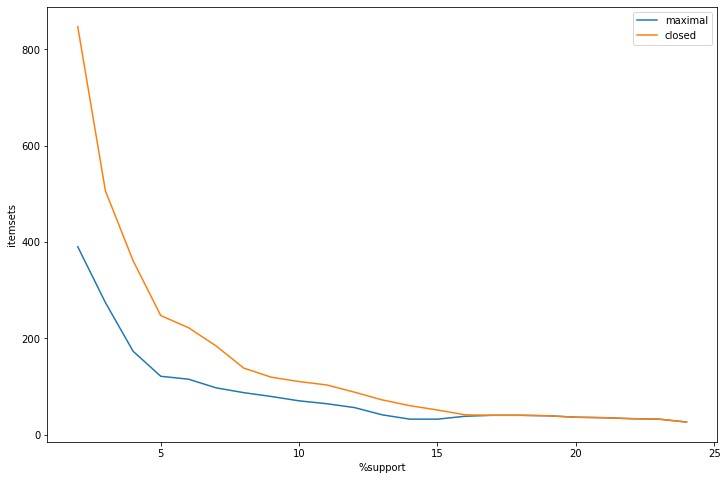

In [22]:
len_max_it = []
len_cl_it = []
max_supp = 25
for i in range(2, max_supp):
    max_itemsets = apriori(X, target="m", supp=i, zmin=zmin)
    cl_itemsets = apriori(X, target="c", supp=i, zmin=zmin)
    len_max_it.append(len(max_itemsets))
    len_cl_it.append(len(cl_itemsets))

plt.plot(np.arange(2, max_supp), len_max_it, label="maximal")
plt.plot(np.arange(2, max_supp), len_cl_it, label="closed")
plt.legend()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()

### Support vs number of itemsets for normal/strong emotional_intensity

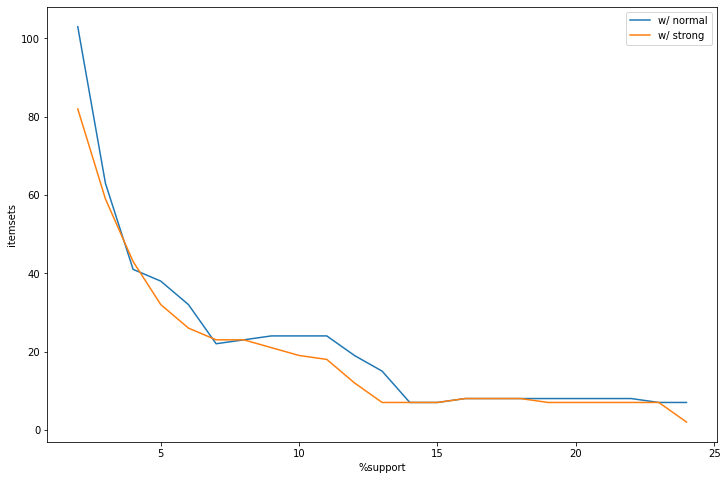

In [24]:
filter_1 = []
filter_2 = []
for i in range(2, max_supp):
    max_itemsets = apriori(X, target="m", supp=i, zmin=zmin)
    filter_1.append(len([item for item in max_itemsets if "normal" in item[0]]))
    filter_2.append(len([item for item in max_itemsets if "strong" in item[0]]))

plt.plot(np.arange(2, max_supp), filter_1, label="w/ normal")
plt.plot(np.arange(2, max_supp), filter_2, label="w/ strong")
plt.legend()
plt.xticks()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()